# Feature selection

Some ideas:
https://github.com/AdeolaAdesina/EDS-Data-Science-Cheatsheet/blob/master/Feature-Engineering-Checklist.pdf

In [1]:
%reload_kedro
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

[10/21/23 22:13:43] INFO     Resolved project path as:                                              ]8;id=754565;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=942899;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/gunee/Projects/Gunee/kaggle-housing-price-prediction.                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/21/23 22:13:43] WARNING  /home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site- ]8;id=642100;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=918063;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py#109\109]8;;\
                             packages/lazy_loader/__init__.py:78: KedroDeprecationWarning:                         
                             'CSVDataSet' has been renamed to 'CSVDataset', and the alias will be                  
                             removed in Kedro-Datasets 2.0.0                                                       
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    WARNING  /home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site- ]8;id=219017;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=759388;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py#109\109]8;;\
                             packages/lazy_loader/__init__.py:78: KedroDeprecationWarning:                         
                             'JSONDataSet' has been renamed to 'JSONDataset', and the alias will be                
                             removed in Kedro-Datasets 2.0.0                                                       
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project Kaggle Housing Price Prediction                          ]8;id=405100;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=225289;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=475039;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=577274;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=686177;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=843202;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [2]:
catalog.list()

['raw_train', 'raw_test', 'data_dictionary', 'clean_data', 'feature_category_dictionary', 'parameters']

# Attributes and their meaning

**Dwelling and Structure Information**:
- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to the property.
- LotArea: Lot size in square feet.
- Street: Type of road access to the property.
- Alley: Type of alley access to the property.
- LotShape: General shape of the property.
- LandContour: Flatness of the property.
- Utilities: Type of utilities available.
- LotConfig: Lot configuration.
- LandSlope: Slope of the property.
- Neighborhood: Physical locations within Ames city limits.
- Condition1: Proximity to various conditions.
- Condition2: Proximity to various conditions (if more than one is present).
- BldgType: Type of dwelling.
- HouseStyle: Style of dwelling.
- OverallQual: Rates the overall material and finish of the house.
- OverallCond: Rates the overall condition of the house.
- YearBuilt: Original construction date.
- YearRemodAdd: Remodel date.
- RoofStyle: Type of roof.
- RoofMatl: Roof material.
- Exterior1st: Exterior covering on the house.
- Exterior2nd: Exterior covering on the house (if more than one material).
- MasVnrType: Masonry veneer type.
- MasVnrArea: Masonry veneer area.
- ExterQual: Exterior material quality.
- ExterCond: Exterior material condition.
- Foundation: Type of foundation.
- BsmtQual: Basement height quality.
- BsmtCond: Basement general condition.
- BsmtExposure: Basement wall exposure.
- BsmtFinType1: Rating of basement finished area.
- BsmtFinSF1: Type 1 finished square feet.
- BsmtFinType2: Rating of basement finished area (if multiple types).
- BsmtFinSF2: Type 2 finished square feet.
- BsmtUnfSF: Unfinished square feet of basement area.
- TotalBsmtSF: Total square feet of the basement area.
- Heating: Type of heating.
- HeatingQC: Heating quality and condition.
- CentralAir: Central air conditioning.
- Electrical: Electrical system.
- 1stFlrSF: First Floor square feet.
- 2ndFlrSF: Second-floor square feet.
- LowQualFinSF: Low-quality finished square feet.
- GrLivArea: Above-grade living area square feet.
- BsmtFullBath: Basement full bathrooms.
- BsmtHalfBath: Basement half bathrooms.
- FullBath: Full bathrooms above grade.
- HalfBath: Half baths above grade.
- BedroomAbvGr: Bedrooms above grade.
- KitchenAbvGr: Kitchens above grade.
- KitchenQual: Kitchen quality.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- Functional: Home functionality.
- Fireplaces: Number of fireplaces.
- FireplaceQu: Fireplace quality.

**Exterior Features and Outdoor Space**:
- WoodDeckSF: Wood deck area in square feet.
- OpenPorchSF: Open porch area in square feet.
- EnclosedPorch: Enclosed porch area in square feet.
- 3SsnPorch: Three-season porch area in square feet.
- ScreenPorch: Screen porch area in square feet.
- PoolArea: Pool area in square feet.
- PoolQC: Pool quality.
- Fence: Fence quality.
- MiscFeature: Miscellaneous features not covered in other categories.
- MiscVal: Value of miscellaneous features.

**Garage Information**:
- GarageType: Garage location.
- GarageYrBlt: Year the garage was built.
- GarageFinish: Interior finish of the garage.
- GarageCars: Size of the garage in car capacity.
- GarageArea: Size of the garage in square feet.
- GarageQual: Garage quality.
- GarageCond: Garage condition.

**Sale Information**:
- PavedDrive: Paved driveway.
- MoSold: Month Sold.
- YrSold: Year Sold.
- SaleType: Type of sale.
- SaleCondition: Condition of sale.
- SalePrice: Sale price of the property.

In [3]:
df = catalog.load('clean_data')
feat_dict = catalog.load('feature_category_dictionary')

                    INFO     Loading data from 'clean_data' (CSVDataset)...                     ]8;id=705673;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=358072;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'feature_category_dictionary' (JSONDataset)...   ]8;id=277807;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=759158;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

# Numeric features
Let's dive into numeric features first.

In [5]:
numeric_attr = feat_dict.get('Numeric')
numeric_attr_with_target = numeric_attr + ['SalePrice']
df_numeric = df[numeric_attr_with_target]

In [6]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  BsmtFullBath   1460 non-null   int64  
 12  BsmtHalfBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  KitchenAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Fireplac

Calculate Pearson's correlation coefficient

In [40]:
import numpy as np

correlation_matrix = df_numeric.corr() 
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

In [41]:
correlation_with_target


SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

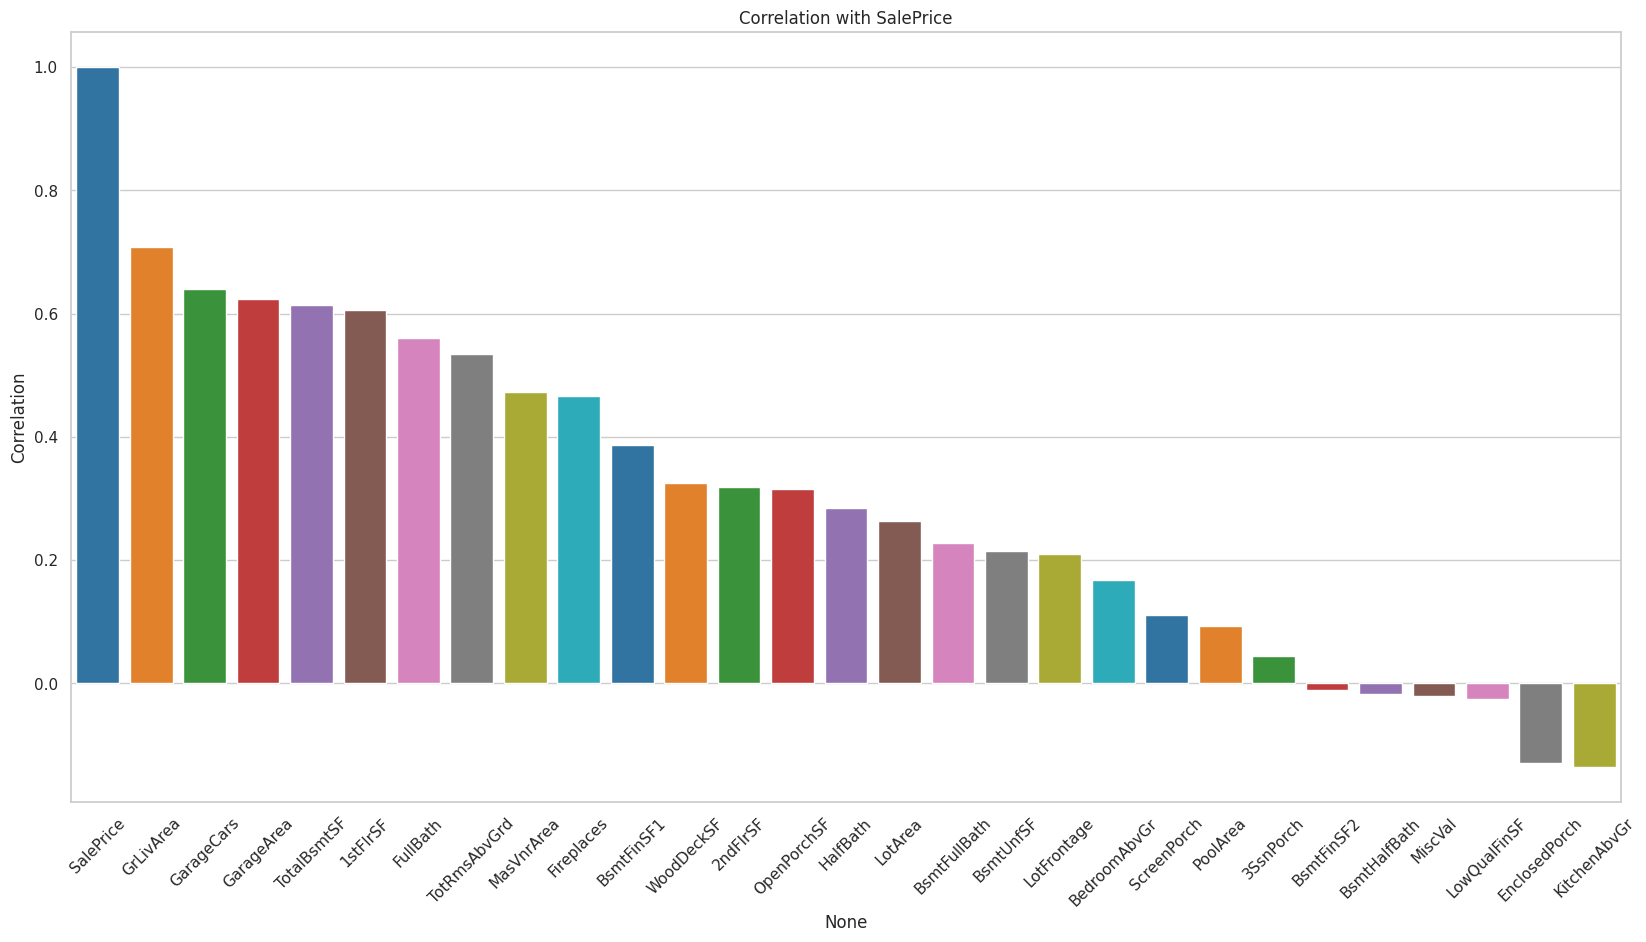

In [42]:
# Plot a barplot of the correlation of attributes with the 'SalePrice' target
plt.figure(figsize=(20, 10))
sns.barplot(x=correlation_with_target.index, 
            hue=correlation_with_target.index,                                       
            y=correlation_with_target.values, palette='tab10') 

# Title and labels for the plot
plt.title("Correlation with SalePrice")
plt.ylabel("Correlation")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

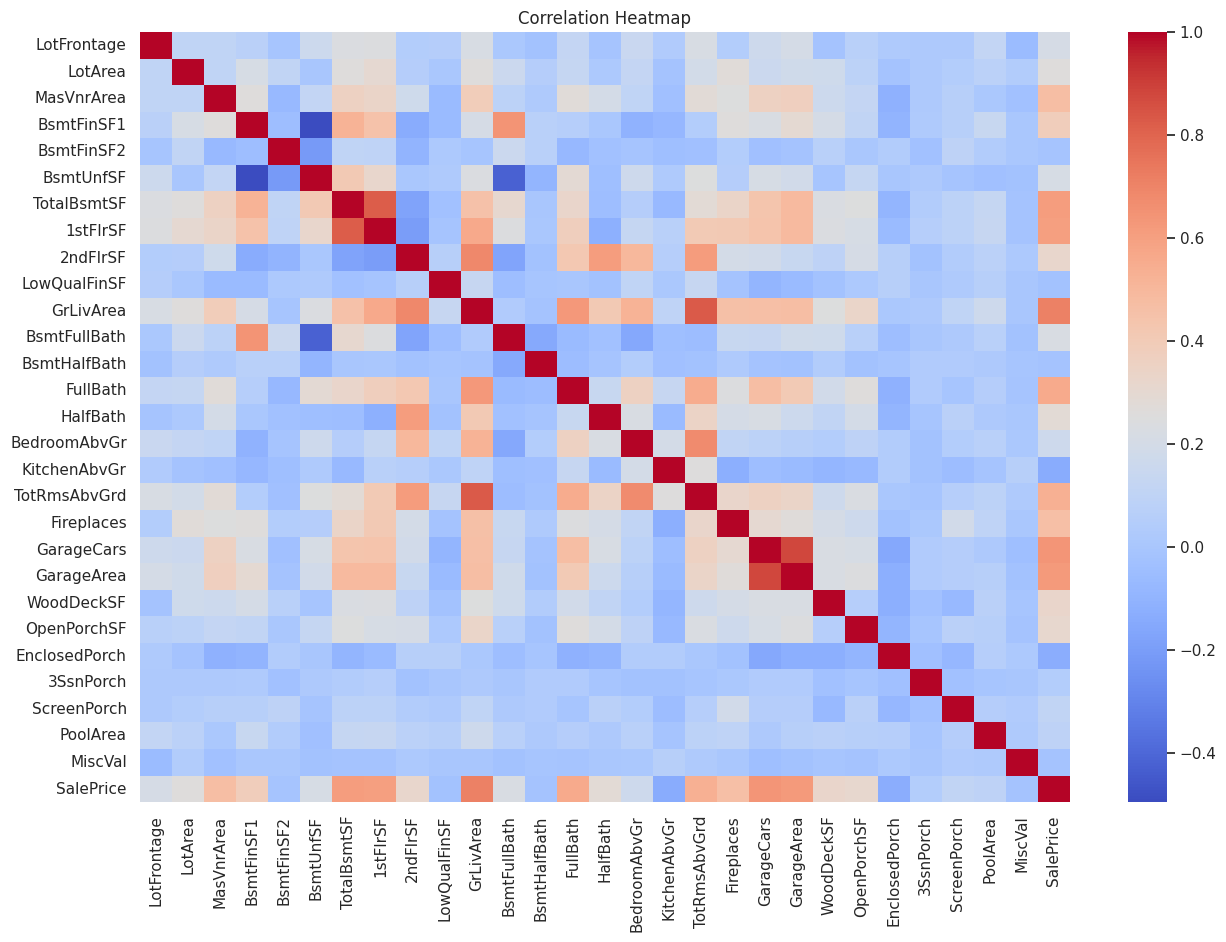

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Title for the plot
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

Different approach

Let's try to select the best features based on univariate statistical tests since we have got some negative Pearson's correlation values. 

"Note however that contrary to f_regression, r_regression values lie in [-1, 1] and can thus be negative. f_regression is therefore recommended as a feature selection criterion to identify potentially predictive feature for a downstream classifier, irrespective of the sign of the association with the target variable." 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

In [46]:
X = df[numeric_attr]
y = df['SalePrice']

In [49]:
from sklearn.feature_selection import r_regression, f_regression
from sklearn.feature_selection import SelectKBest

In [55]:
selector = SelectKBest(f_regression, k=6)
X_new = selector.fit_transform(X, y)

In [56]:
X_new


array([[8.560e+02, 8.560e+02, 1.710e+03, 2.000e+00, 2.000e+00, 5.480e+02],
       [1.262e+03, 1.262e+03, 1.262e+03, 2.000e+00, 2.000e+00, 4.600e+02],
       [9.200e+02, 9.200e+02, 1.786e+03, 2.000e+00, 2.000e+00, 6.080e+02],
       ...,
       [1.152e+03, 1.188e+03, 2.340e+03, 2.000e+00, 1.000e+00, 2.520e+02],
       [1.078e+03, 1.078e+03, 1.078e+03, 1.000e+00, 1.000e+00, 2.400e+02],
       [1.256e+03, 1.256e+03, 1.256e+03, 1.000e+00, 1.000e+00, 2.760e+02]])

In [58]:
selected_features = selector.get_support()
selected_feature_names = [numeric_attr[i] for i, is_selected in enumerate(selected_features) if is_selected]
selected_feature_names

['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea']